# Лабораторная работа №1. Численное дифференцирование

Импортируем библиотеки, введем формулы методов, функции и шаг:

In [100]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import math
import scipy as sp
import scipy.optimize as op
from scipy.interpolate import UnivariateSpline
import os
import sys
from IPython.display import display, Markdown

Примечание: в работе используем библиотеку sympy для символьного дифференцирования (чтобы не выводить производные самостоятельно).

In [104]:
# Вводим переменную, по которой будем выполнять дифференцирование (ее символ)
x = sym.symbols('x')
# Вводим шаг
h = sym.Symbol('h')
# Вводим функцию f
f = sym.Function('f')

sym.init_printing(use_latex=True)

#  Формулы методов
methods = [
    (f(x+h) - f(x))/h,
    (f(x) - f(x-h))/h,
    (f(x+h) - f(x-h))/(2*h),
    sym.Rational('4/3')*(f(x+h) - f(x-h))/(2*h) 
        - sym.Rational('1/3')*(f(x+2*h) - f(x-2*h))/(4*h),
    sym.Rational('3/2')*(f(x+h) - f(x-h))/(2*h)
        - sym.Rational('3/5') *(f(x+2*h) - f(x-2*h))/(4*h)
        + sym.Rational('1/10')*(f(x+3*h) - f(x-3*h))/(6*h)
]

# Изучаемые функции вместе с изучаемой областью
funcs = [
    # Для тригонометрических функций оббегаем 2*pi
    [sym.sin(x**2), np.arange(0, 2*np.pi, 0.01)],
    [sym.cos(sym.sin(x)), np.arange(0, 2*np.pi, 0.01)],
    [sym.exp(sym.sin(sym.cos(x))), np.arange(0, 2*np.pi, 0.01)],
    # Для логарифмической изучаем значения от 2, чтобы избежать ошибки деления на ноль
    [sym.ln(x+3), np.arange(2, 8, 0.01)],
    # Чтобы избежать отрицательных чисел под корнем, выберем начальное значение 0
    [(x+3)**0.5, np.arange(0, 6, 0.01)],
]

# Шаг
h_step = [2 / 2**n for n in range(1, 21 + 1)]

Цель работы: изучить зависимость абсолютной погрешности различных методов от шага ($h_n = \frac{2}{2^n}$, $n=\overline{1,21}$) численного дифференцирования для функций 
1. $\sin(x^2)$
2. $\cos(\sin(x))$
3. $\exp(\sin(\cos(x)))$
4. $\ln(x+3)$
5. $(x+3)^{0.5}$

Список формул методов:

1. $\frac{f(x+h)-f(x)}{h}$
2. $\frac{f(x)-f(x-h)}{h}$
3. $\frac{f(x+h)-f(x-h)}{2h}$
4. $\frac{4}{3}\frac{f(x+h)-f(x-h)}{2h}-\frac{1}{3}\frac{f(x+2h)-f(x-2h)}{4h}$
5. $\frac{3}{2}\frac{f(x+h)-f(x-h)}{2h}-\frac{3}{5}\frac{f(x+2h)-f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h)-f(x-3h)}{6h}$

Значения производных функций:


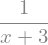

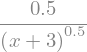

In [105]:
num_derivs = []

# Вычислим и выпишем производные функций
print("Значения производных функций:")

for func, rng in funcs:
    deriv = sym.diff(func, x)
    display(deriv)
    # Сразу же перейдем от символьной записи производных к численной
    num_derivs.append(sym.lambdify(x, deriv, "numpy"))

Приступим к вычислению абсолютных погрешностей. В цикле для каждой функции из массива будем строить график зависимости абсолютной погрешности от шага. 

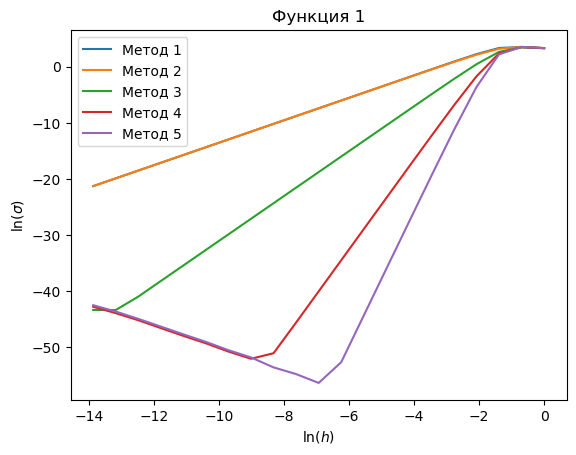

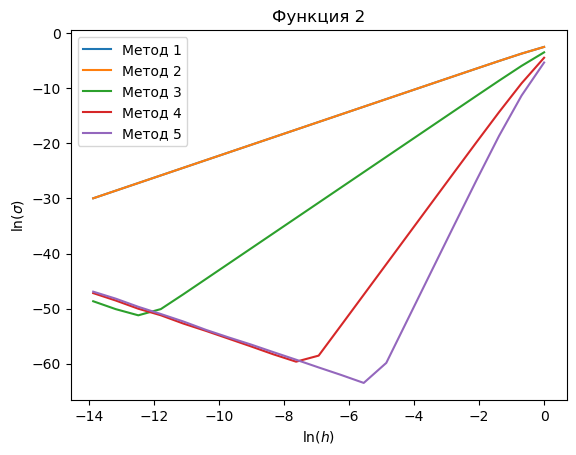

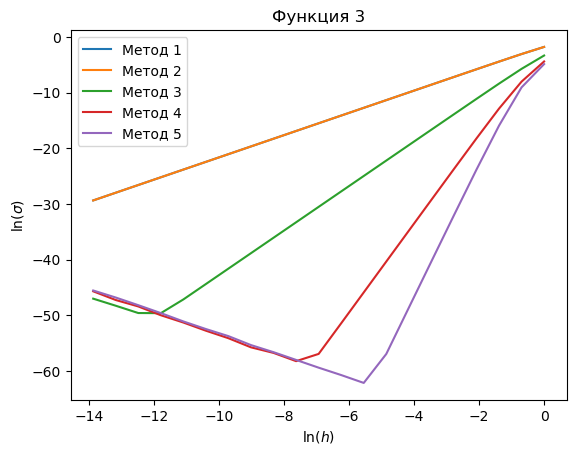

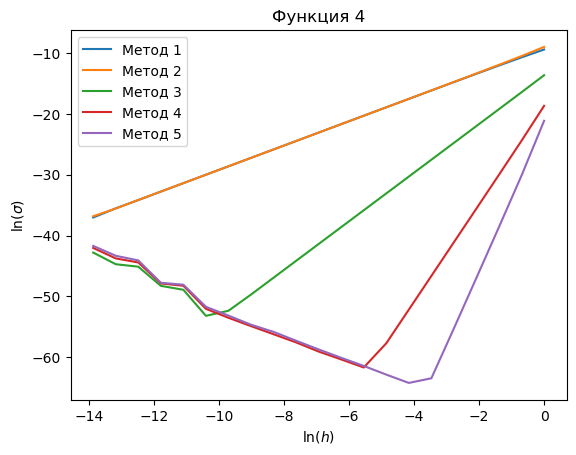

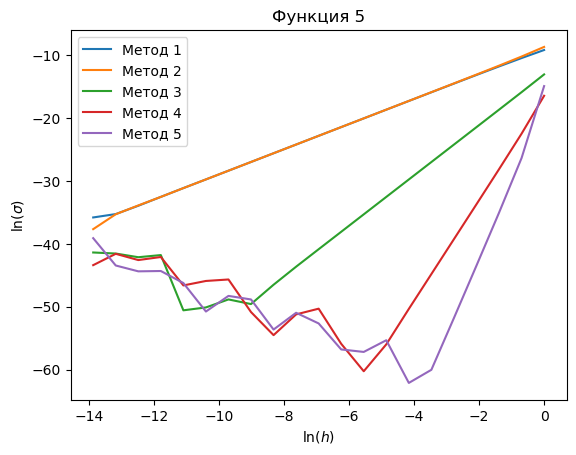

In [106]:
for i in range (0, 5):
    func, rng = funcs[i]
    for k in range (0, 5):
        method = methods[k]
        # В символьном представлении заменим функцию f на func
        repl_method = method.replace(f, lambda arg: func.subs(x, arg))

        # Переходим к подсчету абсолютной погрешности (средний квадрат разности между получившимися значениями) и построению графиков
        error = []
        for h_val in h_step:
            method = sym.lambdify(x, repl_method.subs(h, h_val), "numpy")
            error.append(sum((num_derivs[i](rng) - method(rng))**2) / len(rng))
        
        plt.plot(np.log(h_step), np.log(error), label=rf"Метод {k+1}")

    plt.title(rf"Функция {i + 1}")
    plt.xlabel(r"$\ln (h)$")
    plt.ylabel(r"$\ln (\sigma$)")
    plt.legend()
    plt.show()
    

Выше представлены графики зависимости абсолютной погрешности (обозначена как $\sigma$) от шага $h$. Графики подписаны номером соответсвующей функции, в легенде указаны номера методов. 

Видим, что лучше всего себя ведет 5ый метод: с помощью него можно добиться минимальной погрешности. При этом можем заметить закономерный рост после достижения некоторого минимального значения погрешности, соответствующего оптимальному шагу $h_{опт}$. 